## Examples

#### Training and Visualizing a decision tree
We will train a decision tree for classification. 

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:,2:] # petal leangth and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2) # maximum tree depth equal 2
tree_clf.fit(X,y) # fitting the model

DecisionTreeClassifier(max_depth=2)

In sklearn there is no way of representing graphs. On thing we can do is creating the code for visualizing the tree, using the .dot format of graphviz. Graphviz is a package that is used to create, modify and represent graphs. 

In [ ]:
from sklearn.tree import export_graphviz

# this snippet of code creates a .dot file for graphviz
export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names= iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

Once you have succesfully exported the .dot file, you can copy and paste the code on the online visualizer (search for **Graphviz online**)

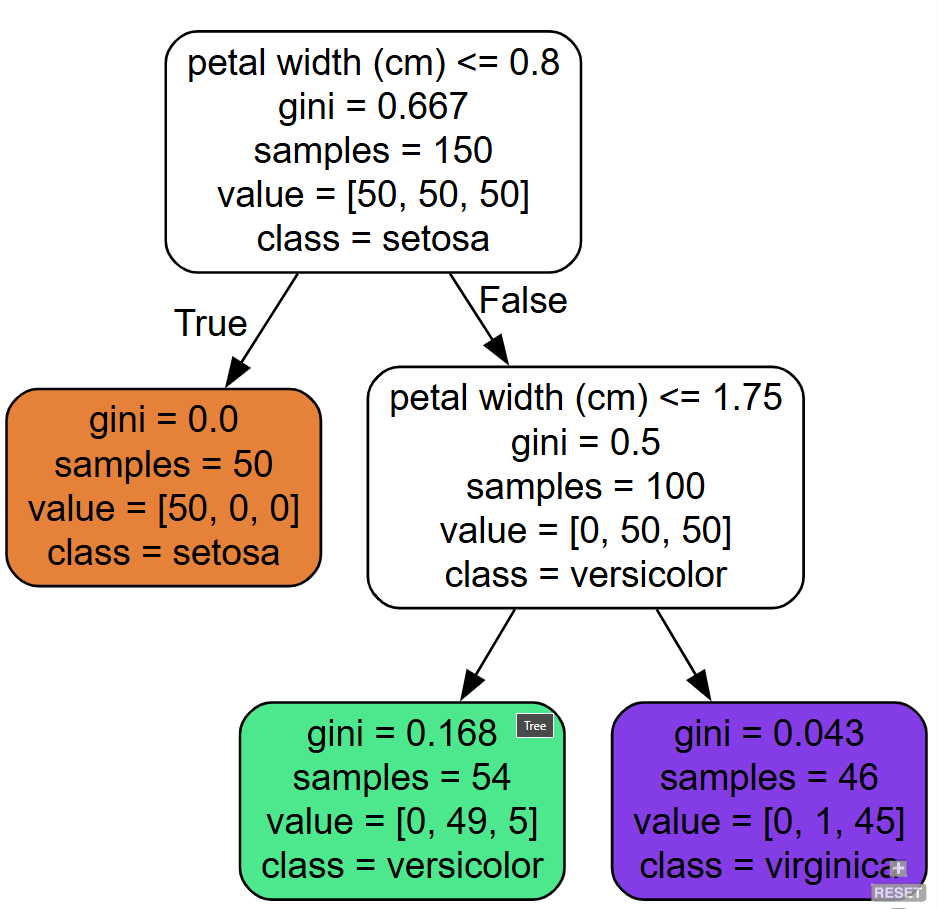

where:
- gini: represents the Gini impurity of the node
- samples: the number of instances in the node
- value: a list showing the number of instances of every class in the node
- class: output of the node

In [ ]:
# making probability predictions for each possible class, given x
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [ ]:
# making the prediction
tree_clf.predict([[5,1.5]])
# output: versicolor

array([1])

Decision trees are very easy models to interpret. Once the tree has been trained, the classification of a new instance can also be made by hand. Try following the tree from root to leafs, for classifying a flower with:
- petal width = 5
- petal length = 1.5

#### Regression
We can also build trees for regression problems. The difference wrt the trees for classification tasks is the training optimization problem. With the ones for regression we try to optimize every split to minimize the MSE, with the ones for classification we try to minimize the Gini Impurity (or maximizing the Information Gain). By default Sklearn trains the decision tree for classifcation using the Gini impurity parameter. By the way it doesn't make a big difference using the Information Gain. 

In [8]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2)
tree_reg.fit(X,y)

DecisionTreeRegressor(max_depth=2)

In [ ]:
from sklearn.tree import export_graphviz

# this snippet of code creates a .dot file for graphviz
export_graphviz(
    tree_reg,
    out_file="iris_tree_reg.dot",
    feature_names= iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

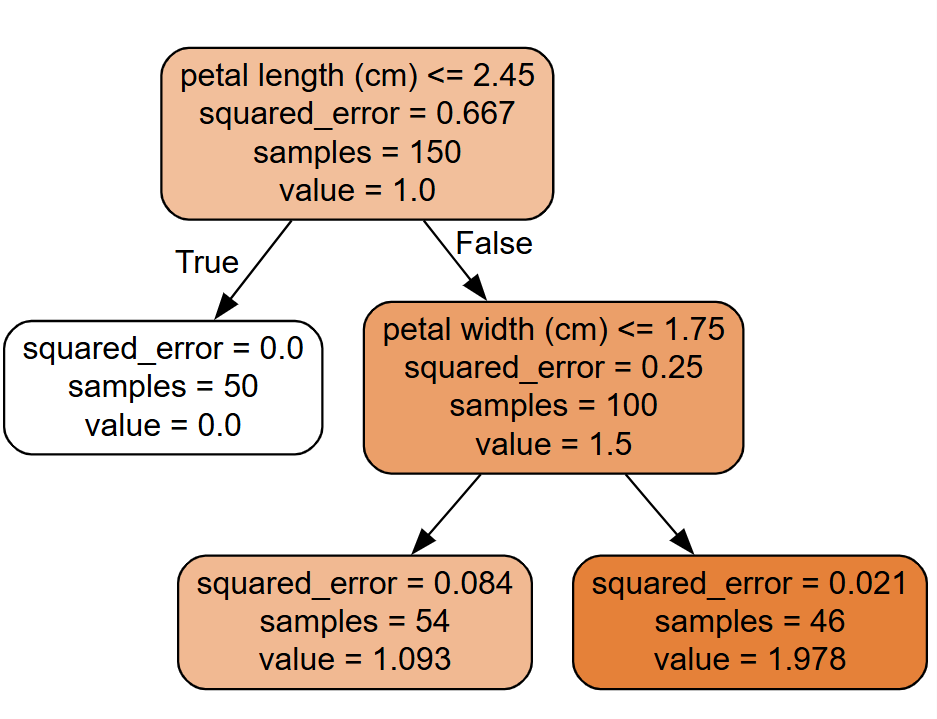

#### Hyperparameters
Decision trees are very prone to overfitting the data. Some hyperparameters can be set to avoid this:
- *max_depth* The maximum depth the tree can reach during training. The higher the more likely it is the tree will overfit the data
- *min_samples_split* The minimum number of samples a node must have befre it can be split
- *min_samples_leaf* The minimum number of samples a leaf node must have
- *max_leaf_nodes* The maximum nuber of leaf nodes
- *max_features* The maximum number of feature evaluated for splitting each node

## Exercises

1. What is the approximate depth of a decision tree trained (without restrictions) on a training set with one million instances?

The average depth of a tree trained on these data would be equal to: 
$$\log_2{10^6} = 20$$

2. Is a node's Gini impurity generally lower or greater than its parents? Is it *generally* lower/greater or *always* lower/greater?

In the CART algorithm used in scikit learn to train decision trees, at every split considered, we find the best pair feature-threshold in order to minimize the Gini impurity measure. So the impurity of a node is *always* lower than the one of its parents. Infact the only instance of non-splitting is when the gini impurity of the current node is already zero, meaning that all the instances in that node are of the same class.   

3. If a decision tree is overfitting the training set, is it a good idea to try decreasing the *max_depth* parameter?

Yes, it is. Decrising the *max_depth* parameter helps creating a less complex tree, limiting the maximum depth it can reach during training. The less deep the tree is, the less divisions in the feature space will be considered. So decreasing the *max_depth* parameter may help reducing the overffiting probability of the tree. 

4. If a decision is underfitting, is it a good idea to try scaling the input features?

No, it isn't. For the way we build decision trees, there's no comparison between different features. So reciprocal scale issues won't happen and feature scaling doesn't affect the way a tree performs. If the tree is underfitting, feature scaling won't help. 

5. If it takes one hour to train a decision tree on a training set containig 1 million instances, roughly how much time will take to train anothe decision tree on a training set containing 10 million instances? 

The training algorithm complexity is:
$$ O(n \cdot m \log_2{m}) $$ 
where m is the number of instances in the training set and n the number of features. 
So if with $m=10^6$  one hour is needed, than the time needed for $10^7$ will be about:
$$\log_2(10) \cdot 1 = 3.3 \text{hours}$$

6. If your training set contains 100,000 instances, will setting $presort=True$ speed up training?

Yes it will. Setting $presort=True$ will sort the data before the training algorithm start, speeding it up. But when the training instances are in the millions, sorting them may take too long to be efficient. 

7. Train and fine-tune a decision tree on the moons dataset

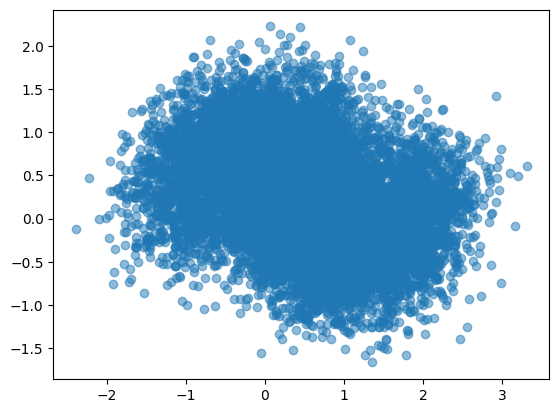

In [35]:
# Generate the dataset
from sklearn.datasets import make_moons
data = make_moons(n_samples=10000, noise=0.4, random_state=42)

X = data[0]
y = data[1]
 
from matplotlib import pyplot
pyplot.scatter(data[0][:,0], data[0][:,1], alpha = 0.5)

In [37]:
# create a training and a test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.2, random_state=42)

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [39]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=17, random_state=42)

In [40]:
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.852875

8. Grow a forest

In [ ]:
# Generate 1000 subsets of the training set, each containing 100 instances selected randomly
from sklearn.model_selection import ShuffleSplit

n_trees = 1000
n_instances = 100

mini_sets = []

rs = ShuffleSplit(n_splits=n_trees, test_size=len(X_train) - n_instances, random_state=42)
for mini_train_index, mini_test_index in rs.split(X_train):
    X_mini_train = X_train[mini_train_index]
    y_mini_train = y_train[mini_train_index]
    mini_sets.append((X_mini_train, y_mini_train))

In [51]:
# train one decision tree on each subset 
from sklearn.base import clone
from numpy import mean

forest = [clone(grid_search_cv.best_estimator_) for _ in range(n_trees)]

accuracy_scores = []

for tree, (X_mini_train, y_mini_train) in zip(forest, mini_sets):
    tree.fit(X_mini_train, y_mini_train)
    
    y_pred = tree.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

mean(accuracy_scores)

np.float64(0.7961543750000001)

In [55]:
# consider as overall prediction the most frequent one
import numpy as np
from scipy.stats import mode

Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)


y_pred_majority_votes, n_votes = mode(Y_pred, axis=0)

In [ ]:
accuracy_score(y_test, y_pred_majority_votes.reshape([-1]))

0.866125

This is how to implement from scratch a random forest using sklearn, numpy and scipy packages. Don't worry, versions of this are already implemented in sklearn